## Following steps were done to the original dataset
1. mpaa column is removed because it's empty in most rows
2. Data was normalized in order to remove bias in any of the columns
3. PCA is used to reduce the number of columns

In [20]:
import pandas as pd
from sklearn import preprocessing

df = pd.read_csv("movies.tsv", "\t")

In [21]:
df = df.drop("mpaa",1)
df = df[pd.notnull(df['budget'])]

df = df.reset_index(drop=True)

In [22]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df.drop('title',1))
df_normalized = pd.DataFrame(np_scaled)


In [23]:
cols = [col for col in df.columns if col not in ['title']]
df[cols] = df_normalized.values


In [24]:
df.to_csv('movies_normalized.csv', index=False)

## PCA part

In [25]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd

df = pd.read_csv("movies_normalized.csv")

X = df.drop('title',1).values
n_clusters = 4

In [32]:
model = PCA(n_components=2, random_state=0,)
results = model.fit_transform(X)
df_pca = pd.DataFrame(results)
df_pca['title'] = df['title']
df_pca.to_csv('movies_pca.csv', index=False)

model = PCA(n_components=3, random_state=0,)
results = model.fit_transform(X)
df_pca_3d = pd.DataFrame(results)
df_pca_3d['title'] = df['title']
df_pca_3d.to_csv('movies_pca_3d.csv', index=False)

## PCA Visualization

In [27]:
from sklearn.cluster import KMeans
import numpy as np
X = df.drop('title',1).values

kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)

df['cluster'] = kmeans.labels_

In [28]:
df_pca['cluster'] = df['cluster']

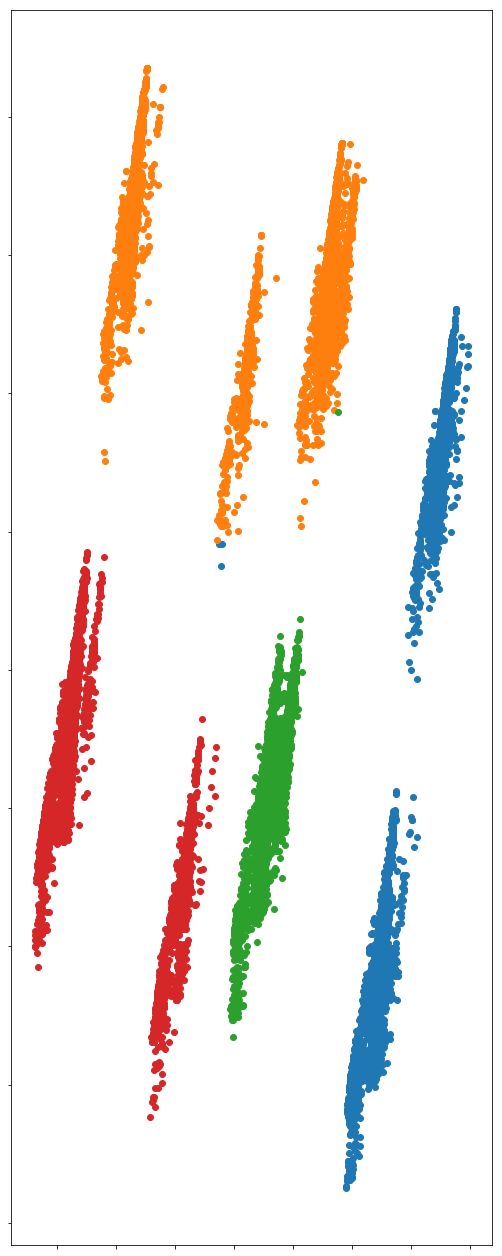

In [29]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
fig = plt.figure(figsize=(50, 50))
ax = fig.add_subplot(2, 5, 10)
for i in range(n_clusters):
    plt.scatter(df_pca[df_pca.cluster == i][0].values, df_pca[df_pca.cluster == i][1].values)

ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()

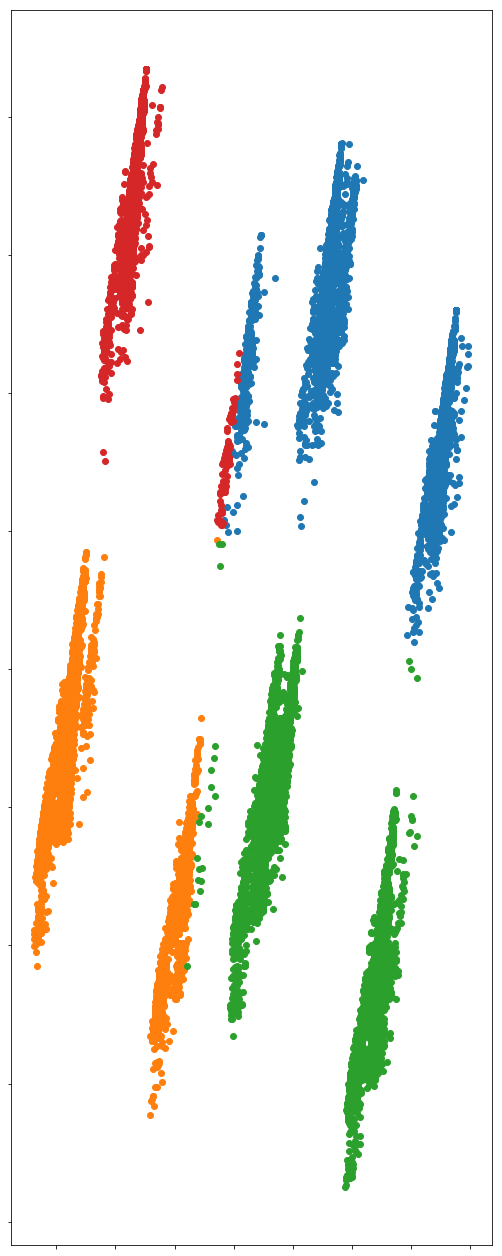

In [11]:
n_clusters = 4

model = PCA(n_components=2, random_state=0,)
results = model.fit_transform(X)
df_pca = pd.DataFrame(results)

kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_pca.values)

df_pca['cluster'] = kmeans.labels_

import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
fig = plt.figure(figsize=(50, 50))
ax = fig.add_subplot(2, 5, 10)

for i in range(n_clusters):
    plt.scatter(df_pca[df_pca.cluster == i][0].values, df_pca[df_pca.cluster == i][1].values)

ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()